In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Таблица Адреса_Клиенты_К

In [2]:
# Установка параметров подключения к базе данных
server = 'vsrvdit3.wdc.msk.ru'
database = 'DWH'
username = 'UserBI'
password = 'WyFx86'

# Формирование строки подключения
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}}; \
                      SERVER={server}; \
                      DATABASE={database}; \
                      UID={username}; \
                      PWD={password}'

# Устанавливаем соединение с базой данных
connection = pyodbc.connect(connection_string)

# Формируем SQL-запрос для выгрузки таблицы
sql_query = f'SELECT * FROM [DWH].[dbo].[Адреса_Клиенты_К]'

# Загрузка данных из базы данных в пандас датафрейм
df = pd.read_sql(sql_query, connection)

# Закрываем соединение
connection.close()

C:\Users\samoray\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537364 entries, 0 to 1537363
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Ссылка               1537364 non-null  object 
 1   ПометкаУдаления      1537364 non-null  object 
 2   Код                  1537364 non-null  float64
 3   ИНН                  1537302 non-null  object 
 4   Наименование         1537364 non-null  object 
 5   ЮрФизЛицо            1537364 non-null  object 
 6   Адрес                282250 non-null   object 
 7   РегионОбслуживания   1537364 non-null  object 
 8   ВидАдреса            282250 non-null   object 
 9   Сопровождаемый_ЦПК   5147 non-null     object 
 10  Сопровождаемый_ЧД1С  5963 non-null     object 
 11  КоличествоАдресов    1537364 non-null  int64  
 12  НаличиеИНН           1537364 non-null  object 
 13  Портретный           1537364 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 

In [4]:
df_adres=df[['Ссылка','КоличествоАдресов','Портретный']]
# Удаляем дубли
df_adres=df_adres.drop_duplicates ()
df_adres.shape

(1435030, 3)

# Адреса клиентов

In [5]:
print(f'Есть адрес',df_adres['Ссылка'][df_adres['КоличествоАдресов']>0].count())
print(f'Нет адреса',df_adres['Ссылка'][df_adres['КоличествоАдресов']==0].count())

Есть адрес 176630
Нет адреса 1258400


([<matplotlib.patches.Wedge at 0x6a15ded040>,
 [Text(1.0187821906144015, 0.41482869727987937, 'Есть адрес'),
  Text(-1.1113987639900007, -0.45254037101843037, 'Нет адреса')],
 [Text(0.5556993766987643, 0.22627019851629782, '12.3%'),
  Text(-0.6483159456608337, -0.2639818830940843, '87.7%')])

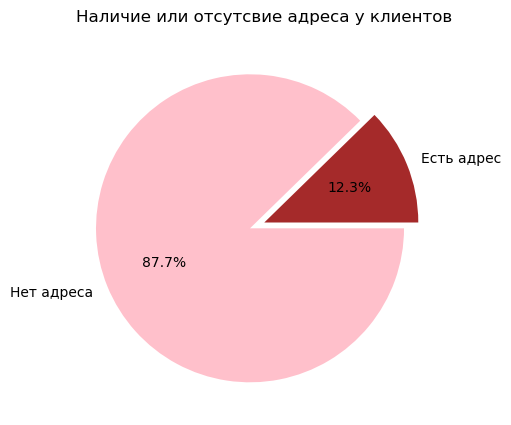

In [6]:
plt.figure(figsize=(5, 5))
values=[df_adres['Ссылка'][df_adres['КоличествоАдресов']>0].count(),df_adres['Ссылка'][df_adres['КоличествоАдресов']==0].count()]
name=['Есть адрес','Нет адреса']
colors=["brown","pink"]
plt.title("Наличие или отсутсвие адреса у клиентов")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Клиенты у которых нет адресов

In [7]:
count_df_adres_false=df_adres[df_adres['КоличествоАдресов']==0].groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"})

count_df_adres_false

,Портретный,Количество
0,Да,73893
1,Нет,1184507


([<matplotlib.patches.Wedge at 0x6a174171f0>,
 [Text(1.0813362179843231, 0.2017721082691073, 'Портретный клиент'),
  Text(-1.179639518256598, -0.22011498578547897, 'Не портретный клиент')],
 [Text(0.5898197552641762, 0.11005751360133124, '5.9%'),
  Text(-0.6881230523163487, -0.12840040837486272, '94.1%')])

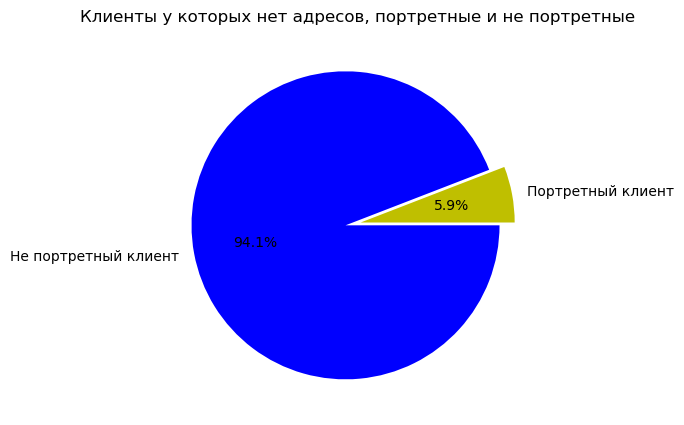

In [8]:
plt.figure(figsize=(5, 5))
values=count_df_adres_false['Количество']
name=['Портретный клиент','Не портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых нет адресов, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Клиенты у которых есть адреса

In [9]:
count_df_adres_true=df_adres[df_adres['КоличествоАдресов']>0].groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"})

count_df_adres_true

,Портретный,Количество
0,Да,22622
1,Нет,154008


([<matplotlib.patches.Wedge at 0x6a17a35970>,
 [Text(1.0121526952381257, 0.4307515775040156, 'Портретный клиент'),
  Text(-1.1041665986215214, -0.469910760132794, 'Не портретный клиент')],
 [Text(0.5520832883117048, 0.23495540591128122, '12.8%'),
  Text(-0.6440971825292208, -0.2741146100774631, '87.2%')])

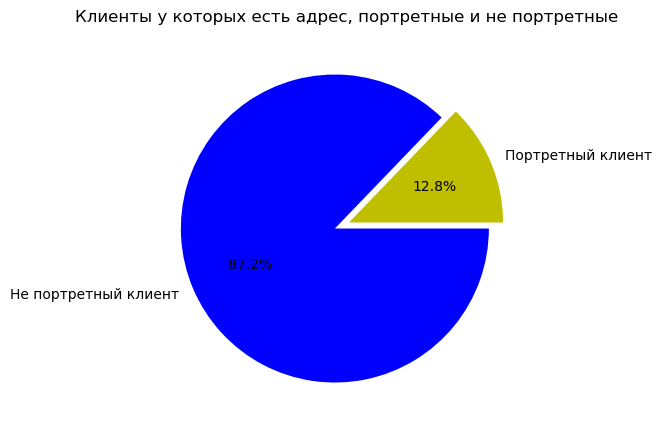

In [10]:
plt.figure(figsize=(5, 5))
values=count_df_adres_true['Количество']
name=['Портретный клиент','Не портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых есть адрес, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Регионы адресов

In [11]:
df_reg=df[['Ссылка','РегионОбслуживания']][df['КоличествоАдресов']>0]
df_reg=df_reg.drop_duplicates ()

In [12]:
df_reg_count=df_reg.groupby(['РегионОбслуживания'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_reg_count=df_reg_count[:3]
df_reg_count

,РегионОбслуживания,Количество
1,Москва,130374
2,Московская область,46582
0,Другой регион,8123


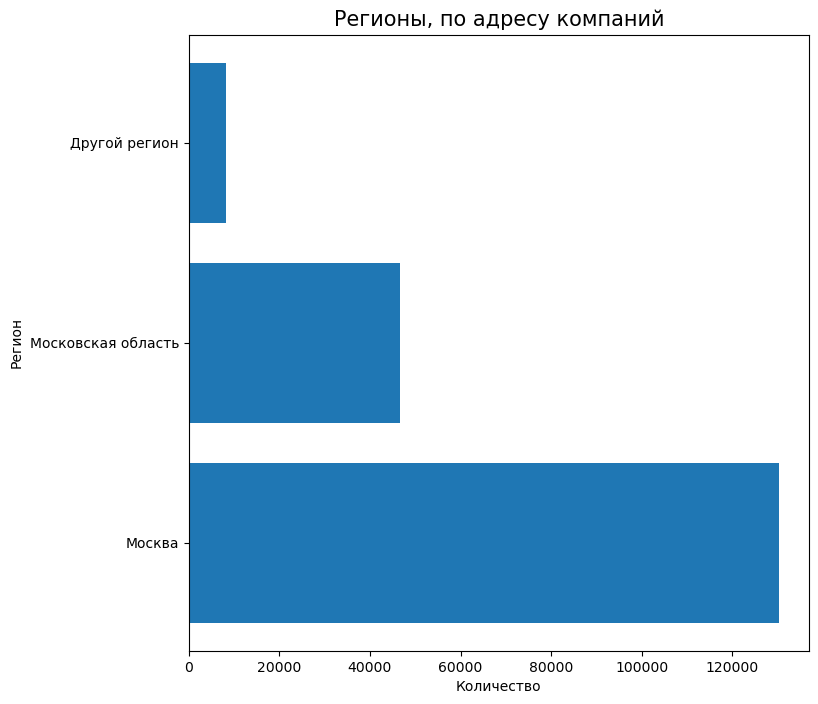

In [13]:
plt.figure(figsize=(8, 8))
plt.barh(df_reg_count['РегионОбслуживания'], df_reg_count['Количество'])
plt.xlabel("Количество")
plt.ylabel("Регион")
plt.title('Регионы, по адресу компаний', fontsize=15)
plt.show()

# ИНН

In [14]:
df_inn=df[['Ссылка','Портретный','НаличиеИНН']]
df_inn=df_inn.drop_duplicates()

In [15]:
df_inn_cnt=df_inn.groupby(['НаличиеИНН'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_inn_cnt

,НаличиеИНН,Количество
0,Да,837308
1,Нет,597722


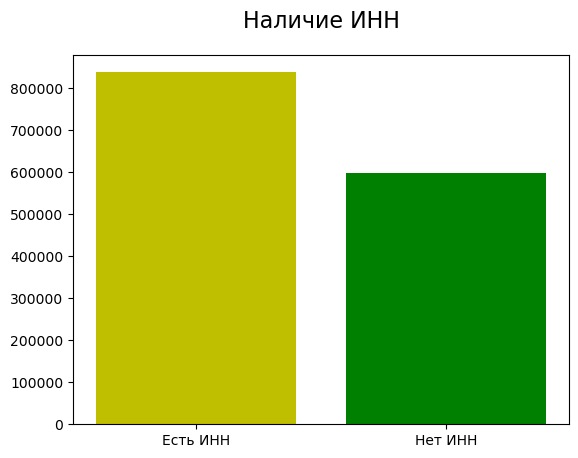

In [16]:
yes=int(df_inn_cnt['Количество'][df_inn_cnt['НаличиеИНН']=='Да'])
no=int(df_inn_cnt['Количество'][df_inn_cnt['НаличиеИНН']=='Нет'])
values=[yes,no]
colors=["y","g"]
name=['Есть ИНН','Нет ИНН']
plt.bar(range(0,2),values,color=colors,tick_label=name)
plt.title(r'Наличие ИНН', fontsize=16, y=1.05);

# Центры ответсвенности 

# ЦПК

In [17]:
cpk=df[['Ссылка','Портретный','Сопровождаемый_ЦПК']]
# Удаляем дубли
cpk=cpk.drop_duplicates ()
cpk.shape

(1435030, 3)

In [55]:
cpk=cpk[cpk['Сопровождаемый_ЦПК']=='Да']
cpk.shape

(3192, 3)

([<matplotlib.patches.Wedge at 0x6a3dbec1c0>,
 [Text(0.7101027126085582, 0.8400917435292218, 'Портретный К+'),
  Text(-0.7746575904694045, -0.9164636476850223, 'Не портретный К+')],
 [Text(0.38732875233194075, 0.45823186010684813, '27.7%'),
  Text(-0.451883594440486, -0.5346037944829296, '72.3%')])

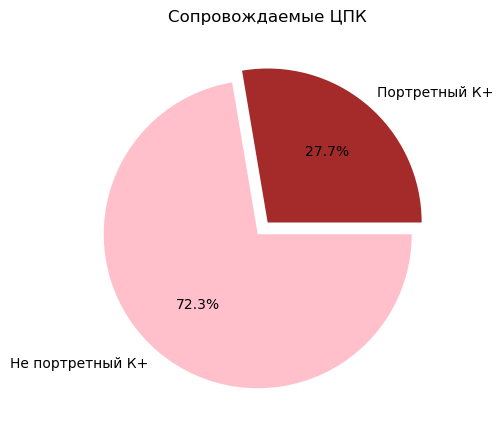

In [19]:
plt.figure(figsize=(5, 5))
values=[cpk['Ссылка'][cpk['Портретный']=='Да'].count(),
        cpk['Ссылка'][cpk['Портретный']=='Нет'].count()]
name=['Портретный К+','Не портретный К+']
colors=["brown","pink"]
plt.title("Сопровождаемые ЦПК")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# ЧД1С

In [20]:
chdc=df[['Ссылка','Портретный','Сопровождаемый_ЧД1С']]
# Удаляем дубли
chdc=chdc.drop_duplicates ()
chdc.shape

(1435030, 3)

In [54]:
chdc=chdc[chdc['Сопровождаемый_ЧД1С']=='Да']
chdc.shape

(2882, 3)

([<matplotlib.patches.Wedge at 0x6a3e0627f0>,
 [Text(0.7480225835190584, 0.8065123771805821, 'Портретный К+'),
  Text(-0.8160247189420292, -0.8798316077952544, 'Не портретный К+')],
 [Text(0.4080123182831227, 0.43991584209849927, '26.2%'),
  Text(-0.4760144193828504, -0.5132351045472316, '73.8%')])

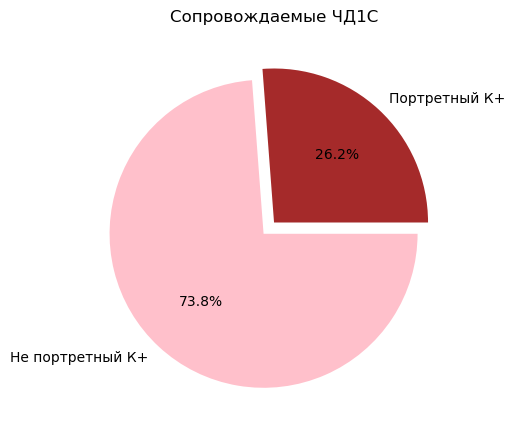

In [22]:
plt.figure(figsize=(5, 5))
values=[chdc['Ссылка'][chdc['Портретный']=='Да'].count(),
        chdc['Ссылка'][chdc['Портретный']=='Нет'].count()]
name=['Портретный К+','Не портретный К+']
colors=["brown","pink"]
plt.title("Сопровождаемые ЧД1С")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Таблица Телефоны_Клиенты_К

In [23]:
# Установка параметров подключения к базе данных
server = 'vsrvdit3.wdc.msk.ru'
database = 'DWH'
username = 'UserBI'
password = 'WyFx86'

# Формирование строки подключения
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}}; \
                      SERVER={server}; \
                      DATABASE={database}; \
                      UID={username}; \
                      PWD={password}'

# Устанавливаем соединение с базой данных
connection = pyodbc.connect(connection_string)

# Формируем SQL-запрос для выгрузки таблицы
sql_query = f'SELECT * FROM [DWH].[dbo].[Телефоны_Клиенты_К]'

# Загрузка данных из базы данных в пандас датафрейм
df = pd.read_sql(sql_query, connection)

# Закрываем соединение
connection.close()

C:\Users\samoray\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300210 entries, 0 to 2300209
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Ссылка               object 
 1   ПометкаУдаления      object 
 2   Код                  float64
 3   Наименование         object 
 4   НомерТелефона        object 
 5   РегионТелефона       object 
 6   КоличествоТелефонов  int64  
 7   Портретный           object 
dtypes: float64(1), int64(1), object(6)
memory usage: 140.4+ MB


In [25]:
df_number=df[['Ссылка','КоличествоТелефонов','Портретный']]
# Удаляем дубли
df_number=df_number.drop_duplicates ()
df_number.shape

(1435030, 3)

In [26]:
print(f'Есть телефон',df_number['Ссылка'][df_number['КоличествоТелефонов']>0].count())
print(f'Нет телефона',df_number['Ссылка'][df_number['КоличествоТелефонов']==0].count())

Есть телефон 1129104
Нет телефона 305926


([<matplotlib.patches.Wedge at 0x6a22036df0>,
 [Text(-0.862382363990849, 0.6828591789509423, 'Есть телефон'),
  Text(0.9407806909712233, -0.7449373742105493, 'Нет телефона')],
 [Text(-0.47039038035864483, 0.37246864306415034, '78.7%'),
  Text(0.5487887363998802, -0.43454680162282033, '21.3%')])

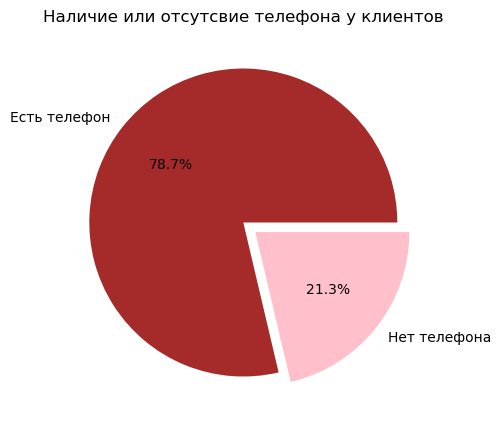

In [27]:
plt.figure(figsize=(5, 5))
values=[df_number['Ссылка'][df_number['КоличествоТелефонов']>0].count(),
        df_number['Ссылка'][df_number['КоличествоТелефонов']==0].count()]
name=['Есть телефон','Нет телефона']
colors=["brown","pink"]
plt.title("Наличие или отсутсвие телефона у клиентов")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Есть телефоны

In [28]:
df_number_true=df_number[['Ссылка','Портретный']][df_number['КоличествоТелефонов']>0]. \
groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_number_true

,Портретный,Количество
1,Нет,1048303
0,Да,80801


([<matplotlib.patches.Wedge at 0x6a21ce58b0>,
 [Text(-1.0723179657779962, 0.2452227156479199, 'Портретный клиент'),
  Text(1.1698014172123594, -0.2675156897977304, 'Не портретный клиент')],
 [Text(-0.5849007086061796, 0.13375784489886539, '92.8%'),
  Text(0.6823841600405429, -0.15605081904867607, '7.2%')])

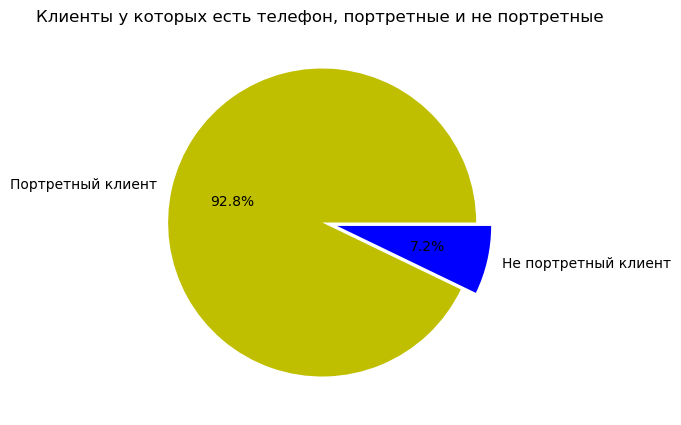

In [29]:
plt.figure(figsize=(5, 5))
values=df_number_true['Количество']
name=['Портретный клиент','Не портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых есть телефон, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Нет телефонов

In [30]:
df_number_false=df_number[['Ссылка','Портретный']][df_number['КоличествоТелефонов']==0]. \
groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_number_false

,Портретный,Количество
1,Нет,290212
0,Да,15714


([<matplotlib.patches.Wedge at 0x6a219442e0>,
 [Text(-1.0857090616120864, 0.1767366219361542, 'Не портретный клиент'),
  Text(1.1844098786256618, -0.192803629151385, 'Портретный клиент')],
 [Text(-0.5922049426975016, 0.09640179378335682, '94.9%'),
  Text(0.690905762531636, -0.11246878367164125, '5.1%')])

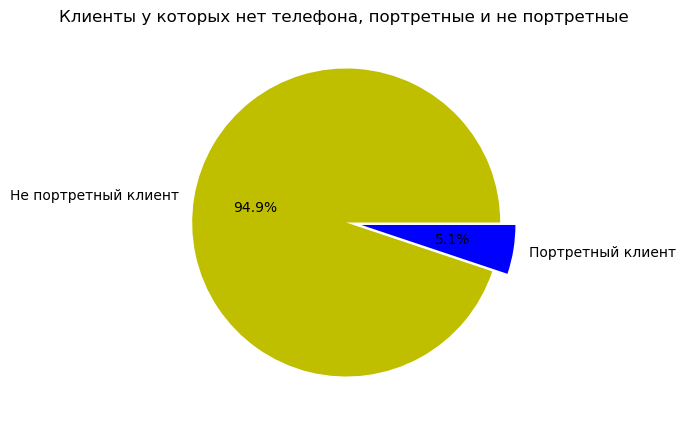

In [31]:
plt.figure(figsize=(5, 5))
values=df_number_false['Количество']
name=['Не портретный клиент','Портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых нет телефона, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Таблица Вид_Деятельности_Клиенты_К

In [32]:
# Установка параметров подключения к базе данных
server = 'vsrvdit3.wdc.msk.ru'
database = 'DWH'
username = 'UserBI'
password = 'WyFx86'

# Формирование строки подключения
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}}; \
                      SERVER={server}; \
                      DATABASE={database}; \
                      UID={username}; \
                      PWD={password}'

# Устанавливаем соединение с базой данных
connection = pyodbc.connect(connection_string)

# Формируем SQL-запрос для выгрузки таблицы
sql_query = f'SELECT * FROM [DWH].[dbo].[Вид_Деятельности_Клиенты_К]'

# Загрузка данных из базы данных в пандас датафрейм
df = pd.read_sql(sql_query, connection)

# Закрываем соединение
connection.close()

C:\Users\samoray\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834776 entries, 0 to 3834775
Data columns (total 11 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Ссылка                       object 
 1   ПометкаУдаления              object 
 2   Код                          float64
 3   ИНН                          object 
 4   Наименование                 object 
 5   СистемаНалогообложения       object 
 6   ВыручкаОтПродаж              float64
 7   КодОКВЭД                     object 
 8   Статус                       object 
 9   КоличествоВидовДеятельности  int64  
 10  Портретный                   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 321.8+ MB


In [34]:
df_vd=df[['Ссылка','КоличествоВидовДеятельности','Портретный']]
# Удаляем дубли
df_vd=df_vd.drop_duplicates ()
df_vd.shape

(1435030, 3)

# Вид деятельности

In [35]:
print(f'Есть вид деятельности',df_vd['Ссылка'][df_vd['КоличествоВидовДеятельности']>0].count())
print(f'Нет вида деятельности',df_vd['Ссылка'][df_vd['КоличествоВидовДеятельности']==0].count())

Есть вид деятельности 114838
Нет вида деятельности 1320192


([<matplotlib.patches.Wedge at 0x6a2145b250>,
 [Text(1.0654201531939622, 0.2736419141289478, 'Есть вид деятельности'),
  Text(-1.16227650280773, -0.29851856059721477, 'Нет вида деятельности')],
 [Text(0.5811382653785248, 0.14925922588851695, '8.0%'),
  Text(-0.6779946266378425, -0.1741358270150419, '92.0%')])

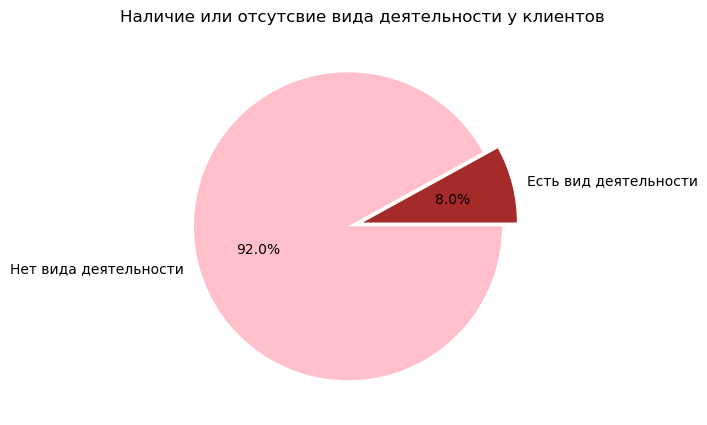

In [36]:
plt.figure(figsize=(5, 5))
values=[df_vd['Ссылка'][df_vd['КоличествоВидовДеятельности']>0].count(),
        df_vd['Ссылка'][df_vd['КоличествоВидовДеятельности']==0].count()]
name=['Есть вид деятельности','Нет вида деятельности']
colors=["brown","pink"]
plt.title("Наличие или отсутсвие вида деятельности у клиентов")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Есть вид деятельности

In [37]:
df_vd_true=df_vd[['Ссылка','Портретный']][df_vd['КоличествоВидовДеятельности']>0]. \
groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_vd_true

,Портретный,Количество
0,Да,76378
1,Нет,38460


([<matplotlib.patches.Wedge at 0x6a20fcc670>,
 [Text(-0.5452849434328562, 0.9553346693517549, 'Портретный клиент'),
  Text(0.594856301926752, -1.04218327565646, 'Не портретный клиент')],
 [Text(-0.29742815096337605, 0.5210916378282299, '66.5%'),
  Text(0.3469995094572719, -0.607940244132935, '33.5%')])

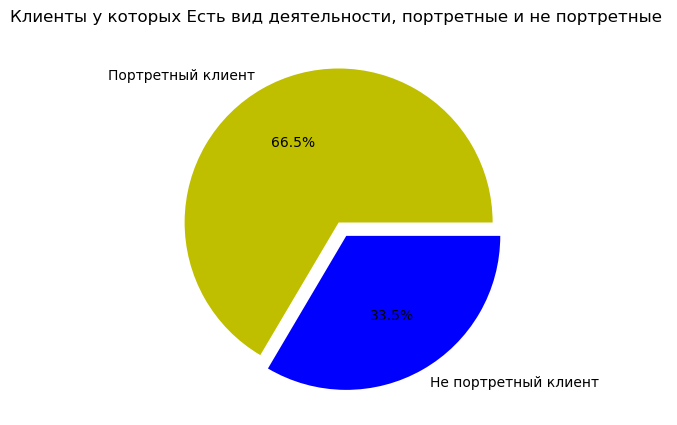

In [38]:
plt.figure(figsize=(5, 5))
values=df_vd_true['Количество']
name=['Портретный клиент','Не портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых Есть вид деятельности, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Нет вида деятельности

In [39]:
df_vd_false=df_vd[['Ссылка','Портретный']][df_vd['КоличествоВидовДеятельности']==0]. \
groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_vd_false

,Портретный,Количество
1,Нет,1300055
0,Да,20137


([<matplotlib.patches.Wedge at 0x6a449f4e50>,
 [Text(-1.0987373188794298, 0.05269064529536569, 'Не портретный клиент'),
  Text(1.1986225328820523, -0.057480637326091204, 'Портретный клиент')],
 [Text(-0.5993112648433253, 0.028740351979290375, '98.5%'),
  Text(0.6991964775145304, -0.0335303717735532, '1.5%')])

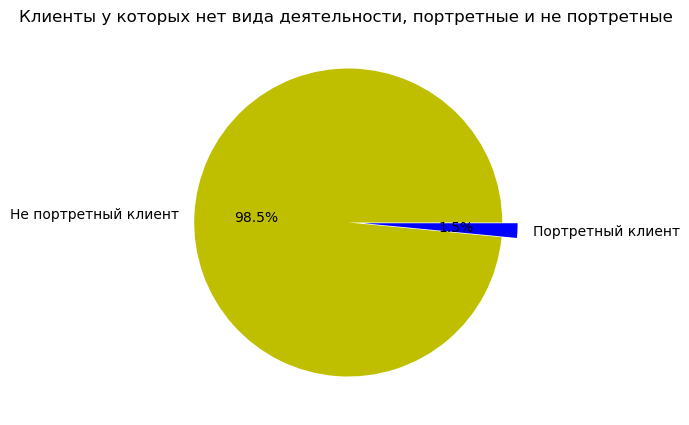

In [40]:
plt.figure(figsize=(5, 5))
values=df_vd_false['Количество']
name=['Не портретный клиент','Портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых нет вида деятельности, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Таблица Почта_Клиенты_К

In [41]:
# Установка параметров подключения к базе данных
server = 'vsrvdit3.wdc.msk.ru'
database = 'DWH'
username = 'UserBI'
password = 'WyFx86'

# Формирование строки подключения
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}}; \
                      SERVER={server}; \
                      DATABASE={database}; \
                      UID={username}; \
                      PWD={password}'

# Устанавливаем соединение с базой данных
connection = pyodbc.connect(connection_string)

# Формируем SQL-запрос для выгрузки таблицы
sql_query = f'SELECT * FROM [DWH].[dbo].[Почта_Клиенты_К]'

# Загрузка данных из базы данных в пандас датафрейм
df = pd.read_sql(sql_query, connection)

# Закрываем соединение
connection.close()

C:\Users\samoray\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730896 entries, 0 to 1730895
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Ссылка            object 
 1   ПометкаУдаления   object 
 2   Код               float64
 3   Наименование      object 
 4   Почта             object 
 5   Почта_Количество  int64  
 6   Портретный        object 
dtypes: float64(1), int64(1), object(5)
memory usage: 92.4+ MB


In [43]:
df_mail=df[['Ссылка','Почта_Количество','Портретный']]
# Удаляем дубли
df_mail=df_mail.drop_duplicates ()
df_mail.shape

(1435030, 3)

# Почта

In [44]:
print(f'Есть почта',df_mail['Ссылка'][df_mail['Почта_Количество']>0].count())
print(f'Нет почты',df_mail['Ссылка'][df_mail['Почта_Количество']==0].count())

Есть почта 656183
Нет почты 778847


([<matplotlib.patches.Wedge at 0x6a1fd0bbe0>,
 [Text(0.1472526305152884, 1.0900993820777665, 'Есть почта'),
  Text(-0.160639344630281, -1.1891993108628822, 'Нет почты')],
 [Text(0.08031961664470276, 0.5945996629515089, '45.7%'),
  Text(-0.09370628436766391, -0.6936995980033478, '54.3%')])

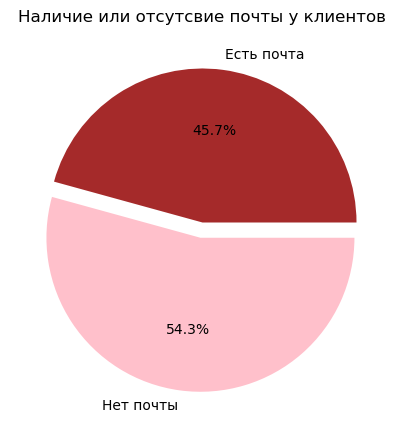

In [45]:
plt.figure(figsize=(5, 5))
values=[df_mail['Ссылка'][df_mail['Почта_Количество']>0].count(),
        df_mail['Ссылка'][df_mail['Почта_Количество']==0].count()]
name=['Есть почта','Нет почты']
colors=["brown","pink"]
plt.title("Наличие или отсутсвие почты у клиентов")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Есть почта

In [46]:
df_mail_true=df_mail[['Ссылка','Портретный']][df_mail['Почта_Количество']>0]. \
groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_mail_true

,Портретный,Количество
1,Нет,603446
0,Да,52737


([<matplotlib.patches.Wedge at 0x6a1f920610>,
 [Text(-1.0651233339221238, 0.2747949845514288, 'Не портретный клиент'),
  Text(1.1619527208982723, -0.2997763739808431, 'Портретный клиент')],
 [Text(-0.5809763639575221, 0.14988817339168845, '92.0%'),
  Text(0.6778057538573253, -0.17486955148882513, '8.0%')])

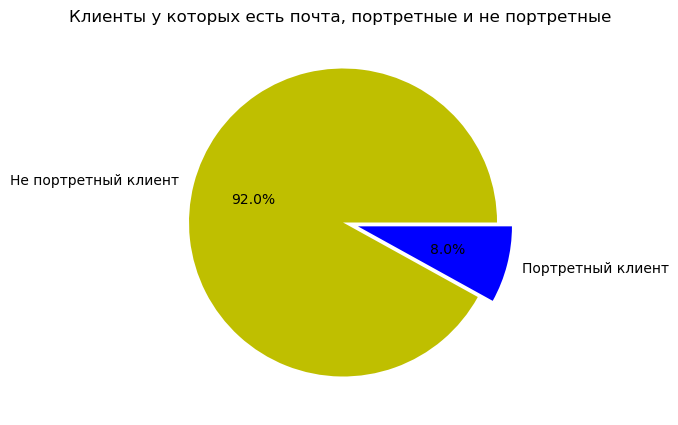

In [47]:
plt.figure(figsize=(5, 5))
values=df_mail_true['Количество']
name=['Не портретный клиент','Портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых есть почта, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Нет почты

In [48]:
df_mail_false=df_mail[['Ссылка','Портретный']][df_mail['Почта_Количество']==0]. \
groupby(['Портретный'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_mail_false

,Портретный,Количество
1,Нет,735069
0,Да,43778


([<matplotlib.patches.Wedge at 0x6a1f399220>,
 [Text(-1.08289428782156, 0.19323550761554362, 'Не портретный клиент'),
  Text(1.1813392230780653, -0.21080237194422954, 'Портретный клиент')],
 [Text(-0.5906696115390326, 0.10540118597211469, '94.4%'),
  Text(0.6891145467955381, -0.12296805030080055, '5.6%')])

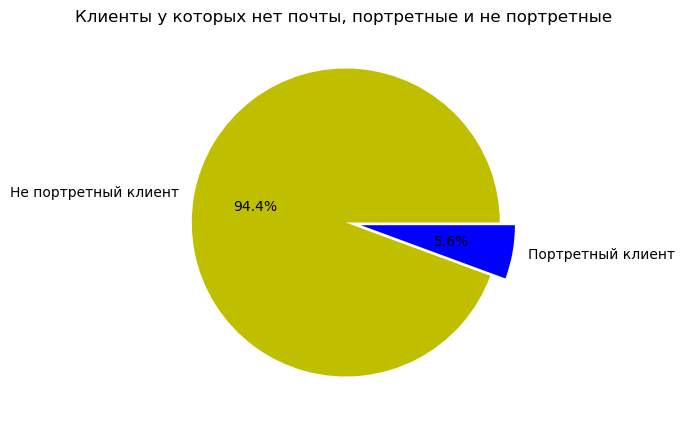

In [49]:
plt.figure(figsize=(5, 5))
values=df_mail_false['Количество']
name=['Не портретный клиент','Портретный клиент']
colors=["y","b"]
plt.title("Клиенты у которых нет почты, портретные и не портретные ")
explode=[0,0.1]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')

# Таблица Клиенты_К_Сводная

In [50]:
# Установка параметров подключения к базе данных
server = 'vsrvdit3.wdc.msk.ru'
database = 'DWH'
username = 'UserBI'
password = 'WyFx86'

# Формирование строки подключения
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}}; \
                      SERVER={server}; \
                      DATABASE={database}; \
                      UID={username}; \
                      PWD={password}'

# Устанавливаем соединение с базой данных
connection = pyodbc.connect(connection_string)

# Формируем SQL-запрос для выгрузки таблицы
sql_query = f'SELECT * FROM [DWH].[dbo].[Клиенты_К_Сводная]'

# Загрузка данных из базы данных в пандас датафрейм
df = pd.read_sql(sql_query, connection)

# Закрываем соединение
connection.close()

C:\Users\samoray\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435030 entries, 0 to 1435029
Data columns (total 19 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Ссылка                       1435030 non-null  object 
 1   ПометкаУдаления              1435030 non-null  object 
 2   Код                          1435030 non-null  float64
 3   Наименование                 1435030 non-null  object 
 4   ФактическийАдрес             174671 non-null   object 
 5   РегионАдреса                 174671 non-null   object 
 6   ЮрФизЛицо                    1435030 non-null  object 
 7   КоличествоАдресов            1435030 non-null  int64  
 8   Почта_Количество             1435030 non-null  int64  
 9   КоличествоТелефонов          1435030 non-null  int64  
 10  СистемаНалогообложения       275053 non-null   object 
 11  ВыручкаОтПродаж              114923 non-null   float64
 12  Статус                       1435030 non-n

In [52]:
df_info=df[['Ссылка','Клиент_Информация']]
df_info_cnt=df_info.groupby(['Клиент_Информация'],as_index=False) \
.aggregate({'Ссылка':"count"}) \
.rename(columns={"Ссылка":"Количество"}) \
.sort_values(by='Количество', ascending=False)
df_info_cnt

,Клиент_Информация,Количество
0,Не полная,1402971
2,Полная,16095
1,Отсутсвует,15964


([<matplotlib.patches.Wedge at 0x6a1edaef10>,
 [Text(-1.097291916390156, 0.07713916142154317, 'Не полная'),
  Text(1.193374365542357, -0.1259270569273216, 'Полная'),
  Text(1.0993282935362199, -0.03843569995125416, 'Отсутсвует')],
 [Text(-0.5985228634855396, 0.04207590622993263, '97.8%'),
  Text(0.6961350465663749, -0.07345744987427091, '1.1%'),
  Text(0.5996336146561199, -0.02096492724613863, '1.1%')])

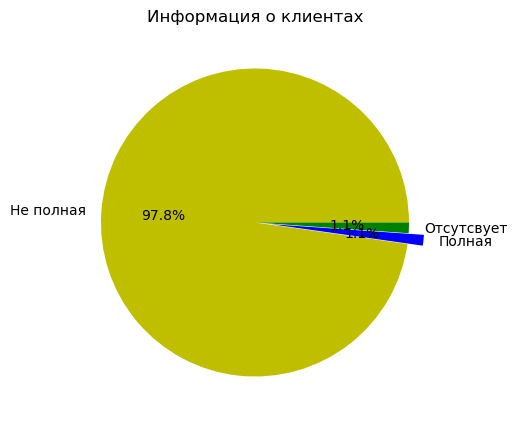

In [53]:
plt.figure(figsize=(5, 5))
values=df_info_cnt['Количество']
name=df_info_cnt['Клиент_Информация']
colors=["y","b","g"]
plt.title("Информация о клиентах")
explode=[0,0.1,0]
plt.pie(values,colors=colors,labels=name,explode=explode,autopct='%1.1f%%')